In [2]:
!pip install pyod

In [3]:
import pandas as pd

# Load the dataset
file_path = '/Users/aviajmera/Downloads/Clustering/Anomaly Detection/all_data (3).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class
0,1867925250,902237363,0,52007310,16978,0,7197292,3968,1,682,...,59244345,7,0,49,26,46,23,23,23,normal
1,1994338334,903845459,0,52098054,16986,0,7227073,3968,1,682,...,59387381,7,0,49,26,46,23,23,23,normal
2,2116573334,905396546,0,52185853,16994,0,7255792,3969,1,682,...,59498140,7,0,49,26,46,23,23,23,normal
3,2257767832,907308930,0,52287097,17015,0,7291152,3975,1,701,...,59581345,7,0,51,27,47,23,24,24,normal
4,2342047724,908534112,0,52347521,17043,0,7313830,3977,1,709,...,59664453,7,0,51,27,47,23,24,24,normal


It appears to have various numerical columns and a 'class' column indicating the nature of each record (e.g., 'normal').

In [4]:
# Data exploration: Understanding the basic structure of the dataset

# Basic information about the dataset
dataset_info = data.info()

# Statistical summary of the dataset
statistical_summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

# Unique values in the 'class' column
unique_classes = data['class'].unique()

dataset_info, statistical_summary, missing_values, unique_classes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ifInOctets11         4998 non-null   int64 
 1   ifOutOctets11        4998 non-null   int64 
 2   ifoutDiscards11      4998 non-null   int64 
 3   ifInUcastPkts11      4998 non-null   int64 
 4   ifInNUcastPkts11     4998 non-null   int64 
 5   ifInDiscards11       4998 non-null   int64 
 6   ifOutUcastPkts11     4998 non-null   int64 
 7   ifOutNUcastPkts11    4998 non-null   int64 
 8   tcpOutRsts           4998 non-null   int64 
 9   tcpInSegs            4998 non-null   int64 
 10  tcpOutSegs           4998 non-null   int64 
 11  tcpPassiveOpens      4998 non-null   int64 
 12  tcpRetransSegs       4998 non-null   int64 
 13  tcpCurrEstab         4998 non-null   int64 
 14  tcpEstabResets       4998 non-null   int64 
 15  tcp?ActiveOpens      4998 non-null   int64 
 16  udpInD

(None,
        ifInOctets11  ifOutOctets11  ifoutDiscards11  ifInUcastPkts11  \
 count  4.998000e+03   4.998000e+03      4998.000000     4.998000e+03   
 mean   2.161260e+09   1.281552e+09     36377.437975     9.150696e+07   
 std    1.233852e+09   1.153395e+09     74228.977904     5.800683e+07   
 min    1.426588e+06   1.618430e+05         0.000000     7.013690e+05   
 25%    1.094045e+09   3.724623e+08         0.000000     5.020809e+07   
 50%    2.180395e+09   8.935678e+08         0.000000     7.906267e+07   
 75%    3.221204e+09   2.448435e+09      4216.000000     1.313896e+08   
 max    4.294416e+09   4.294061e+09    196630.000000     2.439828e+08   
 
        ifInNUcastPkts11  ifInDiscards11  ifOutUcastPkts11  ifOutNUcastPkts11  \
 count       4998.000000     4998.000000      4.998000e+03        4998.000000   
 mean       20425.803922    36377.561825      2.680787e+07        4967.060624   
 std         7936.895813    74228.989718      2.328438e+07        1784.778092   
 min      

Dataset Structure: The dataset contains 4998 entries with 35 columns.
Features: There are 34 numerical features, such as ifInOctets11, ifOutOctets11, tcpOutRsts, etc., and 1 categorical feature, class.
Missing Values: There are no missing values in the dataset.
Class Distribution: The class column, which seems to denote the type of network traffic, includes classes like 'normal', 'icmp-echo', 'tcp-syn', 'udp-flood', 'httpFlood', 'slowloris', 'slowpost', and 'bruteForce'.


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing the data

# Encoding the 'class' column
label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['class', 'class_encoded'], axis=1))

# Creating a new DataFrame with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-2])

# Adding the encoded class back to the DataFrame
scaled_data['class_encoded'] = data['class_encoded']

scaled_data.head()


,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipForwDatagrams,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class_encoded
0,-0.237763,-0.328901,-0.49012,-0.681016,-0.434446,-0.490121,-0.842304,-0.559823,-1.282305,-0.214865,...,-0.737637,0.841844,-1.383294,-0.036788,-0.091427,0.537644,1.172998,0.019586,0.019586,3
1,-0.135298,-0.327507,-0.49012,-0.679452,-0.433437,-0.490121,-0.841025,-0.559823,-1.282305,-0.214865,...,-0.735852,0.841844,-1.383294,-0.036788,-0.091427,0.537644,1.172998,0.019586,0.019586,3
2,-0.036221,-0.326162,-0.49012,-0.677938,-0.432429,-0.490121,-0.839792,-0.559263,-1.282305,-0.214865,...,-0.734469,0.841844,-1.383294,-0.036788,-0.091427,0.537644,1.172998,0.019586,0.019586,3
3,0.078225,-0.324503,-0.49012,-0.676192,-0.429783,-0.490121,-0.838273,-0.555901,-1.282305,-0.181541,...,-0.733431,0.841844,-1.383294,0.017219,-0.038410,0.585665,1.172998,0.073698,0.073698,3
4,0.146538,-0.323441,-0.49012,-0.675151,-0.426255,-0.490121,-0.837299,-0.554780,-1.282305,-0.167510,...,-0.732394,0.841844,-1.383294,0.017219,-0.038410,0.585665,1.172998,0.073698,0.073698,3


The preprocessing step has been completed. The dataset is now scaled, and the 'class' column has been encoded numerically. This prepares the data for effective modeling with anomaly detection algorithms.

In [8]:
from pyod.models.iforest import IForest

# Initialize the Isolation Forest model with your specified parameters
isolation_forest = IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
                           max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
                           verbose=0)

# Fit the model on your scaled dataset (excluding the class column)
isolation_forest.fit(scaled_data.drop(['class_encoded'], axis=1))


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [9]:
# Obtain anomaly scores for each observation
scores_pred = isolation_forest.decision_function(scaled_data.drop(['class_encoded'], axis=1))

# Predict anomalies (0 for normal, 1 for anomaly)
pred = isolation_forest.predict(scaled_data.drop(['class_encoded'], axis=1))

# Add the scores and predictions to the DataFrame
scaled_data['scores'] = scores_pred
scaled_data['anomaly_pred'] = pred


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


/Users/aviajmera/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


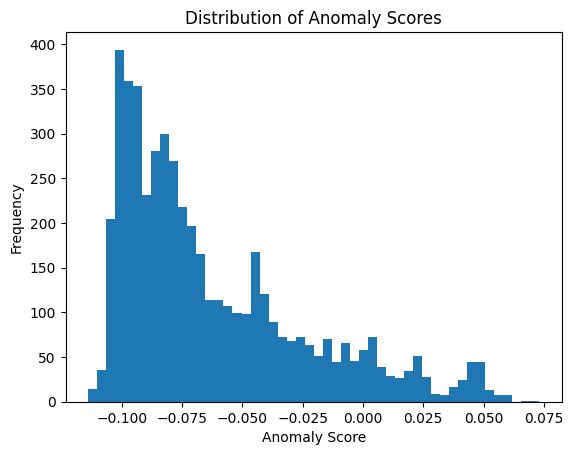

In [10]:
import matplotlib.pyplot as plt

# Histogram of anomaly scores
plt.hist(scaled_data['scores'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


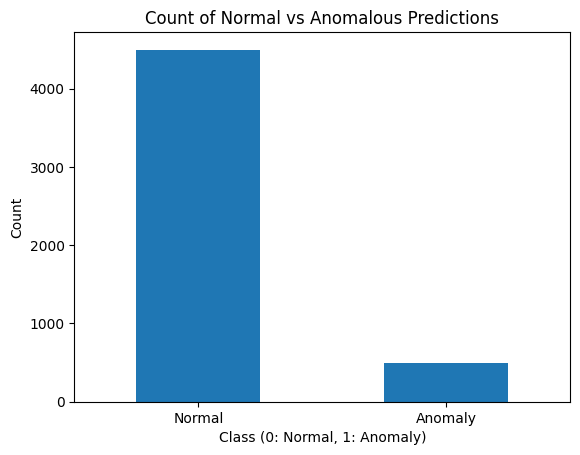

In [11]:
# Count of normal vs anomaly predictions
anomaly_counts = scaled_data['anomaly_pred'].value_counts()

# Bar chart
anomaly_counts.plot(kind='bar')
plt.title('Count of Normal vs Anomalous Predictions')
plt.xlabel('Class (0: Normal, 1: Anomaly)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomaly'], rotation=0)
plt.show()


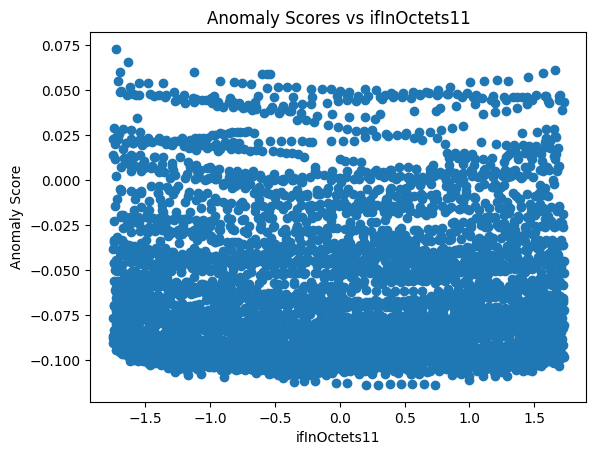

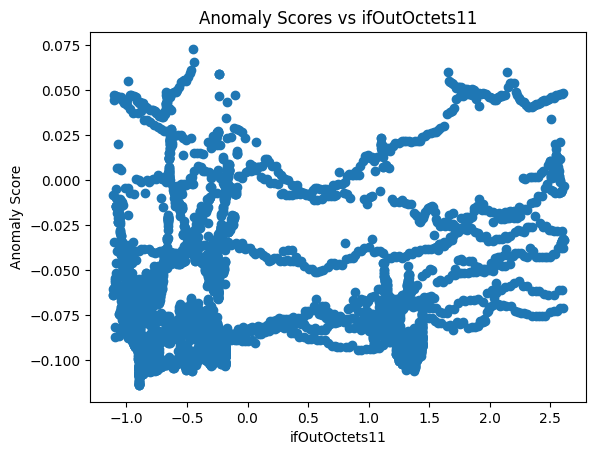

In [12]:
# Scatter plot of anomaly scores against a feature
plt.scatter(scaled_data['ifInOctets11'], scaled_data['scores'])
plt.title('Anomaly Scores vs ifInOctets11')
plt.xlabel('ifInOctets11')
plt.ylabel('Anomaly Score')
plt.show()

plt.scatter(scaled_data['ifOutOctets11'], scaled_data['scores'])
plt.title('Anomaly Scores vs ifOutOctets11')
plt.xlabel('ifOutOctets11')
plt.ylabel('Anomaly Score')
plt.show()
